In [13]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import importlib

In [14]:
max_size = 65
max_size = 39
shots = 8192
num_try = 8
print("max_size:", max_size)
print("shots:", shots)
print("num_try:", num_try)

max_size: 39
shots: 8192
num_try: 8


In [16]:
with open("./pkls/raw/fidelity_info.pkl", "rb") as f:
    raw_fidelity_info = pickle.load(f)
with open("./pkls/lnp/fidelity_info.pkl", "rb") as f:
    lnp_fidelity_info = pickle.load(f)

In [17]:
raw_fidelities_list = raw_fidelity_info["fidelities_list"]
raw_S_phis_list_list = raw_fidelity_info["S_phis_list_list"]
raw_fidelities_mean_list = np.asarray([np.mean(raw_fidelities["fidelities"]) for raw_fidelities in raw_fidelities_list])
raw_fidelities_stddev_list = np.asarray([np.std(raw_fidelities["fidelities"]) for raw_fidelities in raw_fidelities_list])

In [18]:
lnp_fidelities_list = lnp_fidelity_info["fidelities_list"]
lnp_S_phis_list_list = lnp_fidelity_info["S_phis_list_list"]
lnp_fidelities_mean_list = np.asarray([np.mean(lnp_fidelities["fidelities"]) for lnp_fidelities in lnp_fidelities_list])
lnp_fidelities_stddev_list = np.asarray([np.std(lnp_fidelities["fidelities"]) for lnp_fidelities in lnp_fidelities_list])

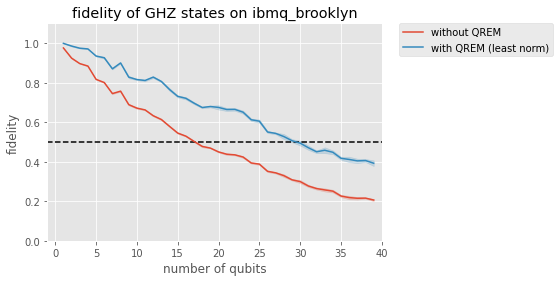

In [19]:
plt.style.use("ggplot")
plt.plot([-1, max_size + 1], [0.5, 0.5], linestyle="--", color="Black")
plt.plot(range(1, max_size + 1), raw_fidelities_mean_list, label="without QREM", color="C0")
plt.fill_between(range(1, max_size + 1), raw_fidelities_mean_list - raw_fidelities_stddev_list, raw_fidelities_mean_list + raw_fidelities_stddev_list, alpha=0.2, color="C0")
plt.plot(range(1, max_size + 1), lnp_fidelities_mean_list, label="with QREM (least norm)", color="C1")
plt.fill_between(range(1, max_size + 1), lnp_fidelities_mean_list - lnp_fidelities_stddev_list, lnp_fidelities_mean_list + lnp_fidelities_stddev_list, alpha=0.2, color="C1")
plt.xlabel("number of qubits")
plt.ylabel("fidelity")
plt.xlim(-1, max_size + 1)
plt.ylim(0, 1.1)
plt.title("fidelity of GHZ states on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [45]:
lnp_fidelities_stddev_list[26:32]

array([0.00444428, 0.0134954 , 0.00815202, 0.01239457, 0.01115238,
       0.00716724])

In [26]:
raw_S_phis_mean_list = [np.mean(np.asarray(raw_S_phis_list), axis=0) for raw_S_phis_list in raw_S_phis_list_list]
raw_S_phis_stddev_list = [np.std(np.asarray(raw_S_phis_list), axis=0) for raw_S_phis_list in raw_S_phis_list_list]

In [27]:
lnp_S_phis_mean_list = [np.mean(np.asarray(lnp_S_phis_list), axis=0) for lnp_S_phis_list in lnp_S_phis_list_list]
lnp_S_phis_stddev_list = [np.std(np.asarray(lnp_S_phis_list), axis=0) for lnp_S_phis_list in lnp_S_phis_list_list]

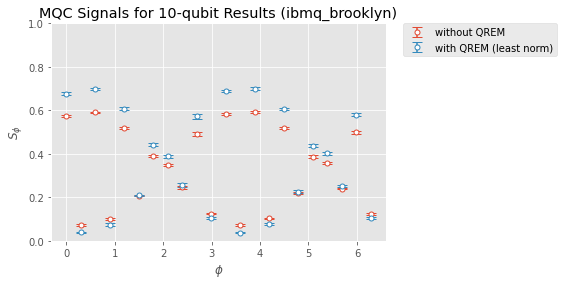

In [39]:
n = 10
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

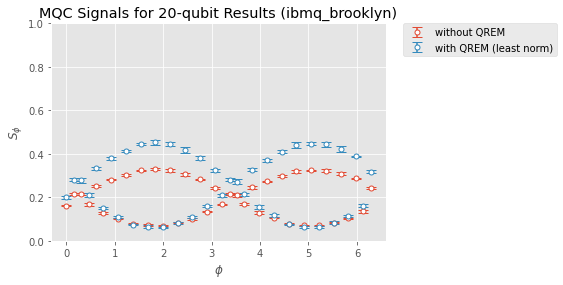

In [41]:
n = 20
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

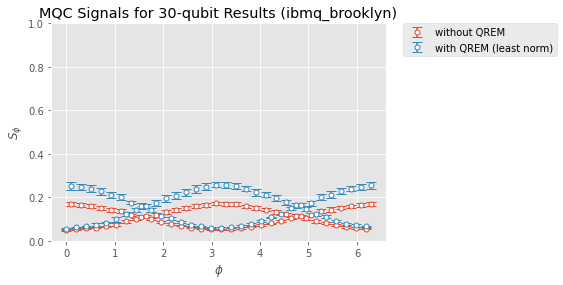

In [40]:
n = 30
plt.style.use("ggplot")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             raw_S_phis_mean_list[n - 1], 
             yerr = raw_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C0', 
             markeredgecolor = "C0", 
             color='w',
             label="without QREM")
plt.errorbar(np.linspace(0, 2 * np.pi, 2 * n + 2), 
             lnp_S_phis_mean_list[n - 1], 
             yerr = lnp_S_phis_stddev_list[n - 1], 
             capsize=5, 
             fmt='o', 
             markersize=5, 
             ecolor='C1', 
             markeredgecolor = "C1", 
             color='w',
             label="with QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)